In [30]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('datasets/Data.csv')
print(dataset)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print('done')

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]
done


In [31]:
# check for empty cells

def get_empty_cells(df: pd.DataFrame) -> pd.DataFrame:
  df2 = df.replace('', np.nan)
  empty_cell_indices = np.where(df2.isna())
  return empty_cell_indices

print(get_empty_cells(X))
print(get_empty_cells(y))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64),)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

print('done')

done


In [33]:
# multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

regressorMLR = LinearRegression()
regressorMLR.fit(X_train_scaled, y_train)
predictedMLR = regressorMLR.predict(X_test_scaled)
scoreMLR = r2_score(y_test, predictedMLR)
print(scoreMLR)

0.9245770872775977


In [34]:
# polynomial
from sklearn.preprocessing import PolynomialFeatures

polynomBuilder = PolynomialFeatures(degree=4)
X_train_polynom = polynomBuilder.fit_transform(X_train_scaled)
X_test_polynom = polynomBuilder.transform(X_test_scaled)

regressorP = LinearRegression()
regressorP.fit(X_train_polynom, y_train)
predictedP = regressorP.predict(X_test_polynom)
scoreP = r2_score(y_test, predictedP)
print(scoreP)

0.938037945656


In [36]:
# svr
from sklearn.svm import SVR

regressorSVR = SVR(kernel='rbf')
regressorSVR.fit(X_train_scaled, y_train)
predictedP = regressorSVR.predict(X_test_scaled)
scoreSVR = r2_score(y_test, predictedP)
print(scoreSVR)


0.9368471045505828


In [41]:
# decision_tree
from sklearn.tree import DecisionTreeRegressor

regressorDT = DecisionTreeRegressor(random_state=4)
regressorDT.fit(X_train_scaled, y_train)
predictedDT = regressorDT.predict(X_test_scaled)
scoreDT = r2_score(y_test, predictedDT)

print(scoreDT)

0.9322301214558856


In [43]:
# random_forest
from sklearn.ensemble import RandomForestRegressor

regressorRF = RandomForestRegressor(n_estimators=100, random_state=0)
regressorRF.fit(X_train_scaled, y_train)
predictedRF = regressorRF.predict(X_test_scaled)
scoreRF = r2_score(y_test, predictedRF)

print(scoreRF)

0.9603546083386362


<function matplotlib.pyplot.show(close=None, block=None)>

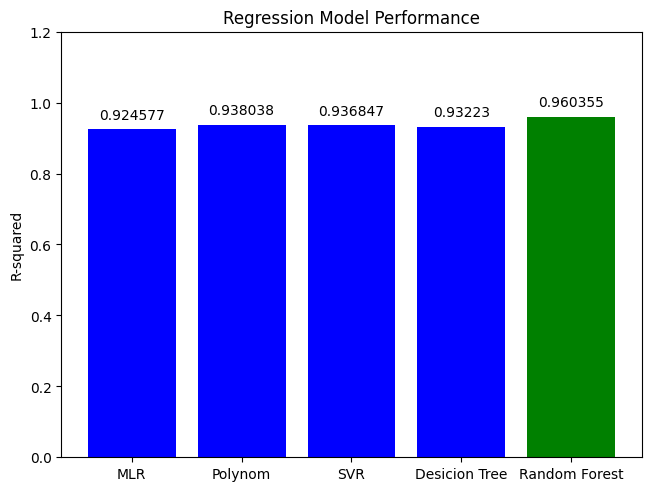

In [74]:
# visualize

import matplotlib.pyplot as plt
regression_types = ["MLR", "Polynom", "SVR", "Desicion Tree", "Random Forest"]
r2_scores = [scoreMLR, scoreP, scoreSVR, scoreDT, scoreRF]
_, ax = plt.subplots(layout='constrained')

def color_with_max_highlithed(values: list[float]) -> list[str]:
  max_value = max(values)
  return ['green' if value == max_value else 'blue' for value in values]

bars = ax.bar(regression_types, r2_scores, color=color_with_max_highlithed(r2_scores))
ax.bar_label(bars, padding=5)
ax.set_ylabel('R-squared')
ax.set_title('Regression Model Performance')
current_y_ticks = plt.gca().get_yticks()
plt.yticks(current_y_ticks)
plt.show